<h1 align="center"> Computation for Physicists </h1>
<h2 align="center"> <em>Eigenvalues and Eigenvectors</em> </h2>
<h2 align="center" > <a href="mailto:duan@unm.edu">Dr. Duan</a> (UNM) </h2>

# Linear Least Squares

- The _least squares_ solution $\mathbf{x}$ to $\mathbf{A}\mathbf{x}\simeq\mathbf{y}$ minimizes the 2-norm of the residual vector $\mathbf{r}=\mathbf{y}-\mathbf{A}\mathbf{x}$.

- The least squares solution can be solved from the _normal equation_ $\mathbf{A}^T\mathbf{A}\mathbf{x}
=\mathbf{A}^T\mathbf{y}$.

- The least squares solution can also be solved from $\mathbf{R}\mathbf{x}=\mathbf{z}_1 = \mathbf{Q}_1^T y$ by backward substitution and the QR factorization
$$\mathbf{A}= \mathbf{Q}\begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix}
=\begin{bmatrix}\mathbf{Q}_1\ \mathbf{Q_2}\end{bmatrix}
\begin{bmatrix}\mathbf{R}\\\mathbf{0}\end{bmatrix} = \mathbf{Q}_1\mathbf{R}.$$

- The _minimum norm solution_ to $\mathbf{A}\mathbf{x}\simeq \mathbf{y}$ is also given by
$$\mathbf{x}=\sum_{i=0}^{k-1} \sigma_i^{-1}\, (\mathbf{u}_i^T\cdot\mathbf{y})\,\mathbf{v}_i$$
after the singular value decomposition (SVD)
$$\mathbf{A} = \mathbf{U} \mathbf{\Sigma}\mathbf{V}^T
= \sum_{i=0}^{n-1}\sigma_i \mathbf{u}_i\mathbf{v}_i^T.$$

- The normal equation method is the fastest but not as stable as the QR factorization. The SVD method is the most robus but much more expensive than the QR factorization.

# Homework
- The _pseudoinverse_ of a $m\times n$ real matrix $\mathbf{A}$ can be written as
$$\mathbf{A}^+ = \mathbf{V}\mathbf{\Sigma}^+\mathbf{U}^T,$$
where $\mathbf{\Sigma}^+$ is a $n\times m$ diagonal matrix with the first $k$ diagonal values being $1/\sigma_i$ ($\sigma_i\neq0)$ and the rest being 0. 

- Write a simple function to compute the pseudoinverse of an arbitrary real matrix. Validate that it produces the inverse of a nonsingular square matrix. Show how it may be used to solve the least squares problem. You may find `numpy.outer()` useful.

In [1]:
import numpy as np
from numpy.random import random
import scipy.linalg as la
import homework.hw6 as hw6

m = n = 20; # problem size
A = random(m*n).reshape((m,n)) # random matrix
np.allclose(la.inv(A), hw6.pinv(A)) # inverse of square matrix

True

In [2]:
n = 3
A = random(m*n).reshape((m,n)) # random matrix
np.allclose(la.pinv(A), hw6.pinv(A)) # pseudoinverse of rect. matrix.

True

In [3]:
t = np.linspace(0, 10, m) # m points in [0, 10]
y = 1 + 2*t + t**2 + (random(m)-0.5) # noisy data points
A = np.empty((m, n)) # construct the matrix for a polynomial fit
A[:,0] = 1.; A[:,1] = t; A[:,2] = t**2
x, *_ = la.lstsq(A, y) # *_ catches the rest of the tuple
print("least squares: x = ", x)
print("pseudoinverse: x = ", hw6.pinv(A) @ y)

least squares: x =  [1.15487755 1.88004715 1.01198085]
pseudoinverse: x =  [1.15487755 1.88004715 1.01198085]


# Eigenvalues and Eigenvectors

- The number $\lambda$ is an eigenvalue of the $n\times n$ matrix $\mathbf{A}$ is there exists a nonzero vector $\mathbf{v}$ such that
$$\mathbf{A}\mathbf{v} = \lambda\mathbf{v}.$$
Geometrically, $\mathbf{A}$ maps the $n$-vector $\mathbf{v}$ to itself with the scaling factor $\lambda$.

- $\lambda$ can be complex even if $\mathbf{A}$ is real.

- All the eigenvalues of $\mathbf{A}$ form its _spectrum_, and the largest magnitude of all eigenvalues is called the _spectral radius_.

- If $\mathbf{A}$ has $n$ linearly independent eigenvectors, then it has $n$ eigenvalues $\lambda_i$ (some can be degenerate). It can be diagonalized by the square matrix $\mathbf{V}$ formed by the eigenvectors $\mathbf{v}_i$ ($i=0,\ldots,n-1$):
$$\mathbf{V}^{-1}\mathbf{A}\mathbf{V}=\mathbf{\Lambda}
=\mathrm{diag}[\lambda_0,\ldots,\lambda_{n-1}].$$

# $n$-Level System with Constant Hamiltonian

- Example: Suppose the Hamiltonian $H$ of an $n$-level quantum system is constant and known. Compute its quantum state $|\psi(t)\rangle$ at time $t$ with a given initial state $|\psi(0)\rangle$.

- Let $|\phi_i\rangle$ ($i=0,1,\ldots,n-1$) be an arbitrary orthonormal basis of the Hilbert space of the quantum system, and $\mathbf{H}$ be the $n\times n$ matrix representation of the Hamiltonian in this basis. Then $c_i(t)=\langle\phi_i|\psi(t)\rangle$ can be solved from the Schrödinger equation:
$$\mathrm{i}\hbar\dot{\mathbf{c}}(t) = \mathbf{H}\,\mathbf{c}(t).$$

- For constant $\mathbf{H}$, one can find the propagator directly:
$$\mathbf{U}(t) = e^{-\mathrm{i}\mathbf{H} t/\hbar} 
= \mathbf{V}e^{-\mathrm{i}\mathbf{\Lambda} t/\hbar}\mathbf{V}^{-1},$$
where 
$$e^{-\mathrm{i}\mathbf{\Lambda} t/\hbar}
=\mathrm{diag}[e^{-\mathrm{i}\lambda_0 t/\hbar}, \cdots, e^{-\mathrm{i}\lambda_{n-1} t/\hbar}].$$ 
The solution to the Schrödinger equation is $\mathbf{c}(t)=\mathbf{U}(t)\, \mathbf{c}(0)$.

In [4]:
class Propagator:
    def __init__(self, H): # object constructor
        "Initialize the Propagator with the Hamiltonian matrix."
        self.w, self.V = la.eigh(H) # compute eigenvalues and eigenvectors
        
    def __call__(self, t, psi0): # make object callable
        '''Return the state vector at t given the initial vector psi0 at t=0.'''
        prop = np.diag(np.exp(-1.0j*self.w*t)) # e^(-iΛt)
        prop = self.V @ prop @ np.conj(self.V.T) # propagator
        return (prop @ psi0)

In [5]:
sigma_x = np.array([[0, 1], [1, 0]]) # 1st Pauli matrix 
prop = Propagator(sigma_x) # propagator object

prop.__dict__ # properties of prop

{'w': array([-1.,  1.]),
 'V': array([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]])}

In [6]:
n = 100 # number of time snapshots
t = np.linspace(0, 2*np.pi, n) # time points
c = np.empty((n, 2), dtype=np.complex128) # snapshots of states
c[0,:] = [1, 0] # initial state
for i in range(n): 
    c[i,:] = prop(t[i], c[0,:]) # object prop is callable

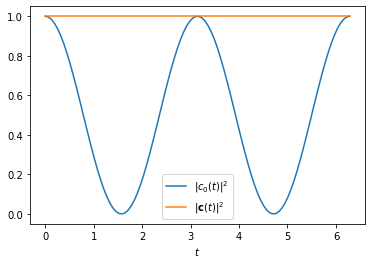

In [7]:
import matplotlib.pyplot as plt
plt.plot(t, np.abs(c[:,0])**2, label=r'$|c_0(t)|^2$')
plt.plot(t, la.norm(c, axis=1)**2, label=r'$|\mathbf{c}(t)|^2$')
plt.xlabel('$t$')
plt.legend()
plt.show()

# Some Math Background

- The eigenvalues of $\mathbf{A}$ are the roots of the chacteristic polynomial
$$\det(\mathbf{A}-\lambda\mathbf{1})=0.$$

- Because the roots of a polynomial of degree larger than 4 cannot always be found with a finite number of steps, the eigenvalues of a matrix are usually computed through iterative processes.

- The eigenvectors of a normal matrix ($\mathbf{A}^\dagger\mathbf{A}=\mathbf{A}\mathbf{A}^\dagger$) are orthogonal, and its eigenvalues are well-conditioned.

- Similarity transformation $\mathbf{A}\rightarrow\mathbf{B}=\mathbf{T}^{-1}\mathbf{A}\mathbf{T}$ preserves eigenvalues. If $\mathbf{B}\mathbf{u}=\lambda\mathbf{u}$, then $\mathbf{A}(\mathbf{T}\mathbf{u})=\lambda(\mathbf{T}\mathbf{u})$.

- It is always possible to make a matrix triangular through a suitable similarity transformation where the eigenvalues are the diagonal entries of the triangular matrix. 

- The eigenvector $\mathbf{v}_i$ of the upper triangular matrix $\mathbf{A}$ can be solved by the backward substitution (up to a constant factor) from $(\mathbf{A}-\lambda_i\mathbf{1})\mathbf{v}_i=\mathbf{0}$.

# Power Iteration

- Suppose $\lambda_0$ has the largest magnitude, then for an arbitary vector $\mathbf{x}_0 =\sum_i c_i \mathbf{v}_i$, one has
$$\mathbf{x}_k=\mathbf{A}^k \mathbf{x}_0 = \lambda_0^k
\left[c_0 \mathbf{v}_0 + \sum_{i>0} \left(\frac{\lambda_i}{\lambda_0}\right) c_i \mathbf{v}_i\right]
\rightarrow \lambda_0^k c_0 \mathbf{v}_0.$$

- One can normalize the vector at each state to prevent overflow or underflow.

- The approximate eigenvalue is given by
$$\lambda_0 \approx \frac{\mathbf{x}_k^T\mathbf{A}\mathbf{x}_k}{\mathbf{x}_k^T\mathbf{x}_k}.$$

- One can shift the matrix, $\mathbf{A}\rightarrow\mathbf{B}=\mathbf{A}-\sigma\mathbf{1}$, to improve the convergence.

In [8]:
A = sigma_x + 1.5*np.eye(2) # shift sigma_x
v = np.array([1, 0]) # initial guess of the eigenvector

numit = 3 # number of iterations
for i in range(numit): 
    v = A @ v # power iteration
    v /= la.norm(v) # normalized the vector
    
print(v) # approximate eigen vector

[0.71274083 0.70142748]


In [9]:
(v @ sigma_x @ v) / (v @ v) # approximate eigenvalue

0.9998720081914758

# QR Iteration

- Let $\mathbf{A}\equiv\mathbf{A}_0\equiv\mathbf{Q}_1\mathbf{R}_1$ be its QR factorization, and
$$\mathbf{A}_k\equiv\mathbf{Q}_k^\dagger\mathbf{A}_{k-1}\mathbf{Q}_k 
=\mathbf{R}_k\mathbf{Q}_k\equiv\mathbf{Q}_{k+1}\mathbf{R}_{k+1}.$$
As $k\rightarrow\infty$, $\mathbf{A}_k$ becomes upper triangular if all the eigenvalues of $\mathbf{A}$ have distinct moduli and block triangular otherwise.

- If $\mathbf{A}$ is Hermitian, then
$$\mathbf{A}_k\rightarrow\mathbf{\Lambda}
\qquad\mathrm{and}\qquad
\mathbf{Q}_1\mathbf{Q}_2\cdots\mathbf{Q}_k \rightarrow\mathbf{V}.$$

In [10]:
A = sigma_x + 1.5*np.eye(2) # shift sigma_x
V = np.eye(2) # initial guess

numit = 10 # number of iterations
for i in range(numit): 
    Q, R = la.qr(A) # QR factorization
    A = R @ Q # generate next A
    V = V @ Q # approximate V
    
print(A-1.5*np.eye(2))

[[ 1.000e+00  2.048e-07]
 [ 2.048e-07 -1.000e+00]]


In [11]:
print(V)

[[ 0.70710685 -0.70710671]
 [ 0.70710671  0.70710685]]


# Singular Value Decomposition (SVD)

- The SVD of a $m\times n$ matrix is given by $\mathbf{A}\equiv\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\dagger$, where $\mathbf{U}$ and $\mathbf{V}$ are $m\times m$ and $n\times n$ unitary matrices, and $\mathbf{\Sigma}$ is a non-negative, $m\times n$ diagonal matrix.

- Because $\mathbf{V}^\dagger(\mathbf{A}^\dagger\mathbf{A})\mathbf{V}
=\mathbf{\Sigma}^\dagger\mathbf{\Sigma}$, the column vectors of $\mathbf{V}$ are the eigenvectors of $\mathbf{A}^\dagger\mathbf{A}$, and the corresponding eigenvalues are the diagonal entries of $\mathbf{\Sigma}^\dagger\mathbf{\Sigma}$ which are the squares of the singular values of $\mathbf{A}$ (and 0).

- Similarly, because $\mathbf{U}^\dagger(\mathbf{A}\mathbf{A}^\dagger)\mathbf{U}
=\mathbf{\Sigma}\mathbf{\Sigma}^\dagger$, the column vectors of $\mathbf{U}$ are the eigenvectors of $\mathbf{A}\mathbf{A}^\dagger$, the corresponding eigenvalues are the diagonal entries of $\mathbf{\Sigma}\mathbf{\Sigma}^\dagger$ which are also the squares of the singular values of $\mathbf{A}$ (and 0).

In [12]:
m = 4; n = 3 # problem size
A = random(m*n).reshape((m,n)) # rect. matrix
U, s, Vh = la.svd(A) # singular value decomposition 
w1, V1 = la.eigh(np.conj(A.T) @ A) # eigenvalue decomposition
print(s**2)
print(np.flip(w1)) # reverse the order of w1

[4.24207033 0.60054404 0.0626429 ]
[4.24207033 0.60054404 0.0626429 ]


In [13]:
w2, U2 = la.eigh(A @ np.conj(A.T)) # eigenvalue decomposition
print(s**2)
print(np.flip(w2)) # reverse the order of w2

[4.24207033 0.60054404 0.0626429 ]
[ 4.24207033e+00  6.00544043e-01  6.26429027e-02 -2.49800182e-16]


# Other Notes

- The efficiency of the QR iteration can be greatly enhancced by first transforming the matrix to the Hessenberg or tridiagonal form.

- SVD can be computed by some variant of the QR iteration.

- `scipy.linalg` provides several functions (e.g., `eig()` and `eigvals()`) to compute the eigenvalues and eigenvectors of an abitrary matrix.

- Computing eigenvectors require additional resources.

- Special algorithms may be available for the matrices of symmetric properties (e.g., `eigh()` and `eig_banded()`).

# Homework

- The roots of the monic polynomial $p(t)=c_0 + c_1 t + \cdots + c_{n-1} t^{n-1} + t^n$ are the same as the eigenvalues of its companion matrix
$$C(p) = \begin{bmatrix}
0 & 0 & \cdots & 0 & -c_0 \\
1 & 0 & \cdots & 0 & -c_1 \\
0 & 1 & \cdots & 0 & -c_2 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & 1 & -c_{n-1}
\end{bmatrix}.$$

- Define class `Polynomial` to generate callable objects that produce the function values of polynomials. A `Polynomial` object is inialized by the coefficients of the polynomial, and it has a method `roots()` to compute the roots of the polynomial. Document and validate your code.

# Packing/Unpacking Function Arguments
- Use tuple and dictionary to pass multiple arguments.

In [14]:
def f(x, y, z):
    print(f'f(x={x}, y={y}, z={z})')
    
args = 2, 3
f(1, *args) # Use * to unpack tuple

f(x=1, y=2, z=3)


In [15]:
kargs = {'z': 1}
f(*args, **kargs) # use ** to unpack dict

f(x=2, y=3, z=1)


- Use `*` and `**` to collect the optional arguments without and with keys.

In [16]:
def g(a, *args, **kargs): # a is required
    l = [str(a)] # required arguments
    l += [str(val) for val in args] # optional positional arguments
    l += [f'{key}={val}' for key, val in kargs.items()] # optional args with keys
    print('g(' + ', '.join(l) + ')')

In [17]:
g(2)
g(2, 3, 4)
g(2, 3, x=5, y=6)

g(2)
g(2, 3, 4)
g(2, 3, x=5, y=6)


# Save and Load Data
- NumPy arrays can be saved and loaded in the text format using `numpy.savetxt()` and `numpy.loadtxt()`.

In [18]:
import numpy as np
data = np.empty((100, 2)) # a 100x2 empty array
data[:,0] = np.linspace(0, 10, 100) # 100 points in [0, 10]
data[:,1] = np.sin(data[:,0])
np.savetxt('data.txt', data)

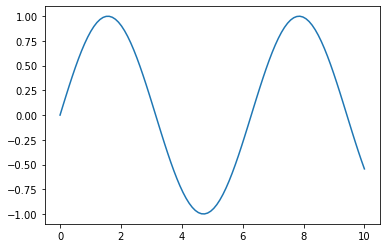

In [19]:
import matplotlib.pyplot as plt
data2 = np.loadtxt('data.txt') # lines starting with # are ignored
plt.plot(data2[:,0], data2[:,1])

- Numpy arrays can also be saved and loaded in the binary format using `numpy.savez()` and `numpy.load()`.

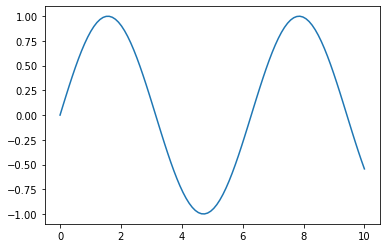

In [20]:
np.savez('data.npz', x=data[:,0], sinx=data[:,1]) # save the data with keys
data3 = np.load('data.npz') # load data as a dictionary
plt.plot(data3['x'], data3['sinx']) 

# End

In [179]:
def _companion(c):
    n = len(c)
    cmat = np.zeros((n,n), dtype=c.dtype)
    cmat[:,-1] = -c[:]
    for i in range(n-1):
        cmat[i+1,i] = 1
    return cmat

class Polynomial:
    def __init__(self, coe):
        self.coe = np.copy(coe)
        
    def __call__(self, x):
        if isinstance(x, np.ndarray):
            res = np.empty(x.shape, dtype=x.dtype)
            res[:] = self.coe[0]
            xp = np.empty(x.shape, dtype=x.dtype)
            xp[:] = 1.
        else:
            res = self.coe[0]
            xp = 1.
        for i in range(1, len(self.coe)):
            xp *= x
            res += self.coe[i]*xp
        return res
    
    def roots(self):
        n = len(self.coe)-1
        cmat = np.zeros((n,n), dtype=self.coe.dtype)
        cmat[:,-1] = -self.coe[:n]/self.coe[-1]
        for i in range(n-1):
            cmat[i+1,i] = 1
        return la.eigvals(cmat)

In [180]:
f = Polynomial(random(10)*10-5)
# f = Polynomial([1, 0, 1])

In [181]:
f.__dict__

{'coe': array([ 4.29516469, -4.24987078, -1.34164291, -4.33002303, -1.16575362,
         2.21509912,  3.24163959, -2.90379734, -4.76495388,  1.3488763 ])}

In [184]:
np.abs(f(f.roots()))

array([4.70734562e-14, 8.05089309e-14, 8.05089309e-14, 4.95722972e-14,
       4.95722972e-14, 4.46517823e-15, 3.39989374e-14, 3.39989374e-14,
       5.82076609e-11])

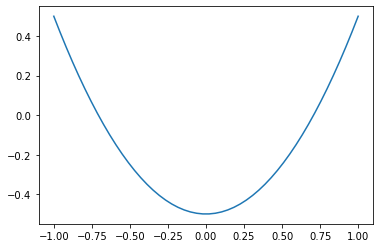

In [170]:
x = np.linspace(-1,1)
plt.plot(x, Polynomial([-0.5,0,1])(x))